In [1]:
import pandas as pd
from bias_variance import plot_hyper_param_train_validation_curve
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import make_scorer, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

data = drop_outliers_iqr(data, 'BMI')
data = drop_outliers_iqr(data, 'GenHlth')

X = data.drop('Diabetes_binary', axis=1)
Y = data['Diabetes_binary']

macro_recall_scorer = make_scorer(recall_score, average='macro')


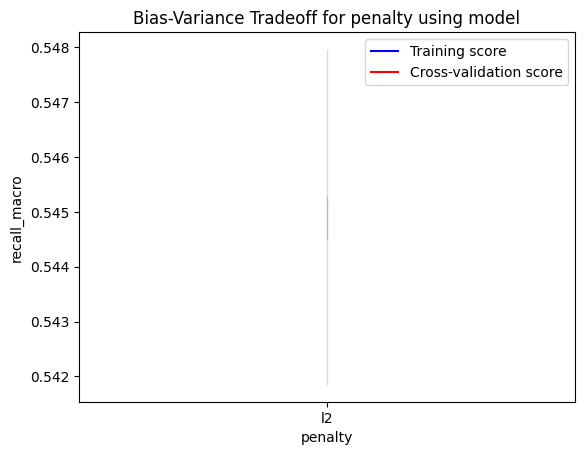

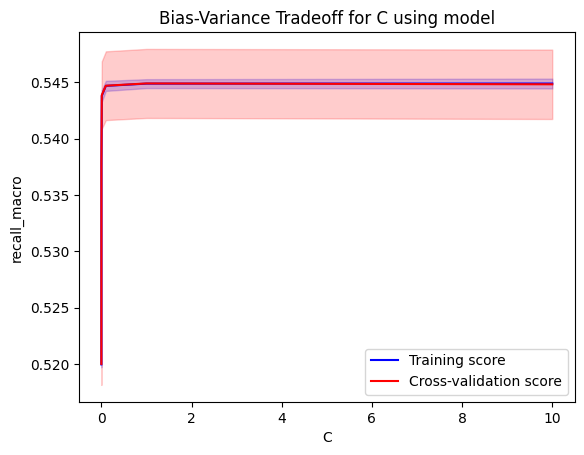

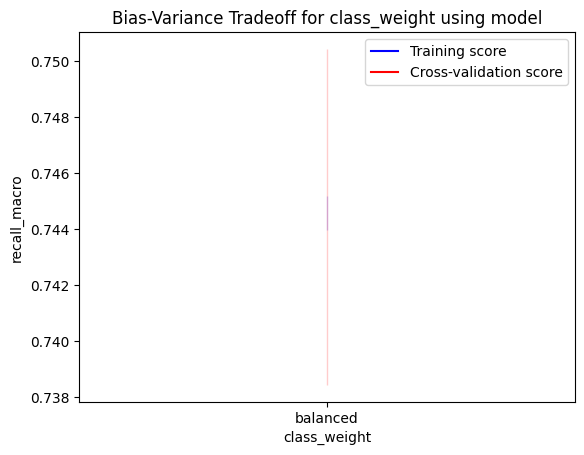

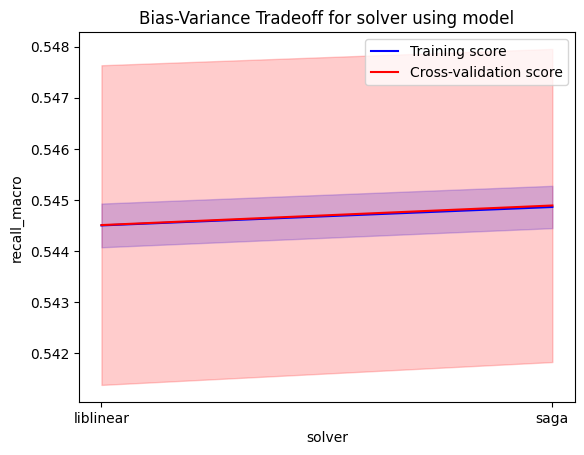

In [10]:

param_grid = {
        'penalty': ['l2', 'l1'],
        'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
        'class_weight': ['balanced'], 
        'solver': ['liblinear', 'saga']
    }


logisticmodel = LogisticRegression(max_iter=1000)
plot_hyper_param_train_validation_curve( logisticmodel,param_grid,X,Y)

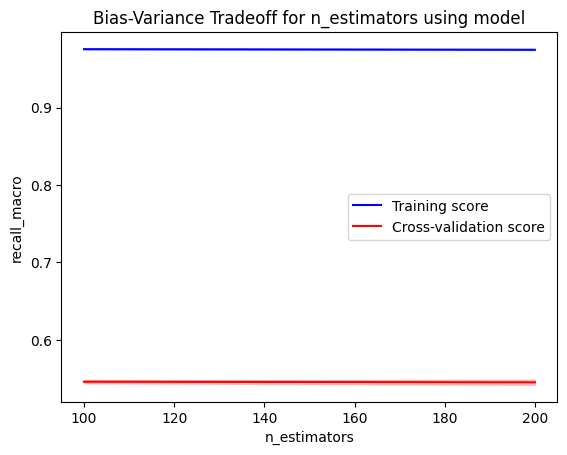

In [ ]:

rf_param_grid = {
        'n_estimators': [100, 200],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False],
        'class_weight': [ 'balanced'],
    }


randomForestmodel = RandomForestClassifier()
plot_hyper_param_train_validation_curve( randomForestmodel,rf_param_grid,X,Y)

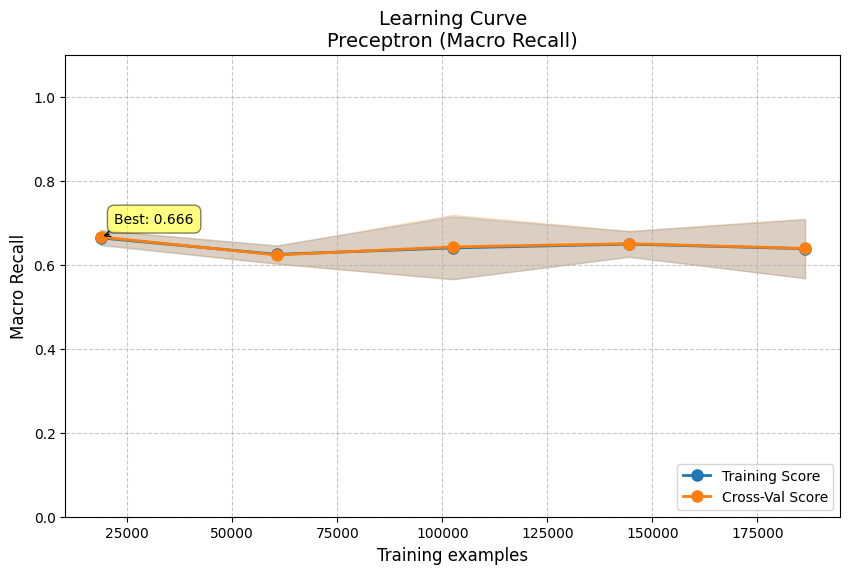

In [ ]:

param_grid ={
        'penalty': ['l1', 'l2', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'eta0': [0.001, 0.01, 0.1],
        'class_weight': ['balanced', None]
    }

preceptronmodel = Perceptron( eta0=0.1, alpha=0.0001,random_state=42,class_weight='balanced',penalty='l1')
plot_hyper_param_train_validation_curve( preceptronmodel,param_grid,X,Y)